<h2>Parkinson’s Disease Detection </h2>

### Imorting the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Reading the Data

In [2]:
parkinson_data = pd.read_csv("parkinsons.data")
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
- status - The health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE, D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

##  Exploratory Data Analysis

In [3]:
parkinson_data.shape
# Provides output which indicates the number of rows and columns present in the dataset. 

(195, 24)

In [4]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

- There are 22 float columns, 1 integer and 1 object column
- There are no null values 

In [42]:
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


- There are some outliers as we can see some attributes have huge difference in their 75 percentile value and maximum value. 

C:\Users\prajw\AppData\Local\Temp\ipykernel_14456\196359189.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


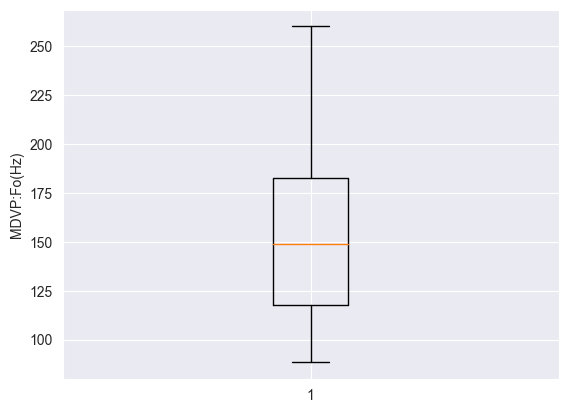

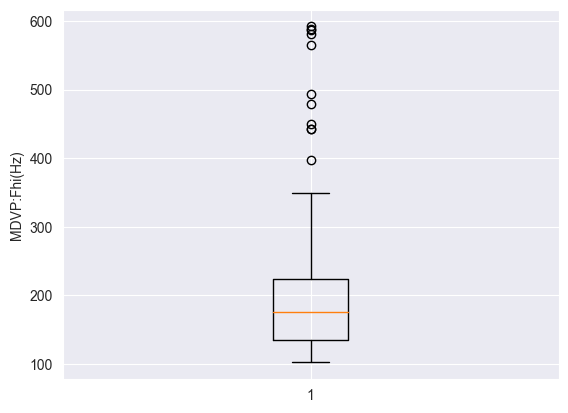

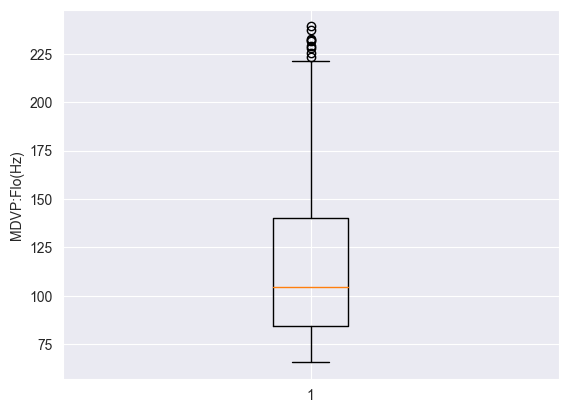

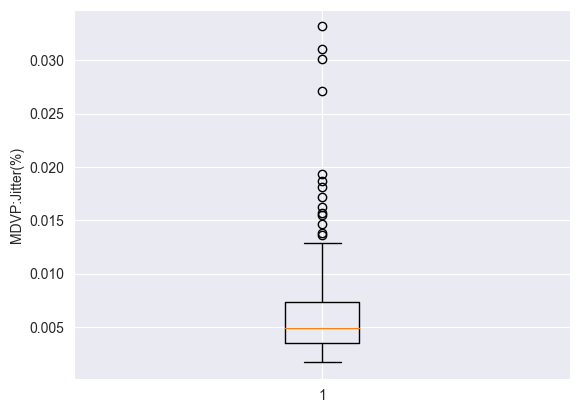

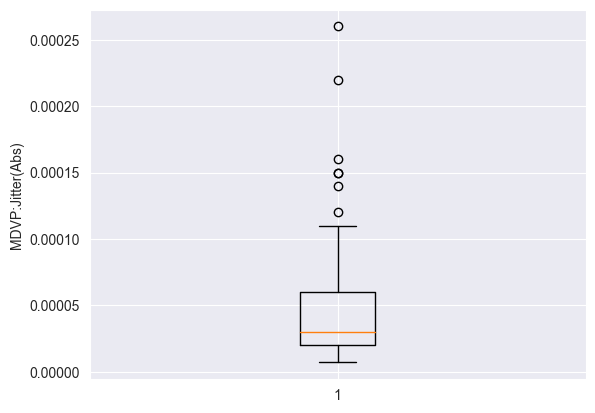

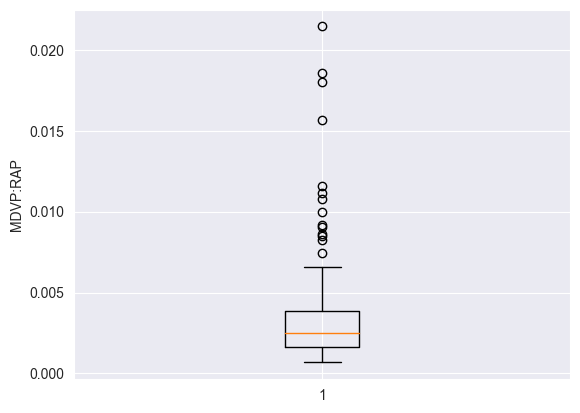

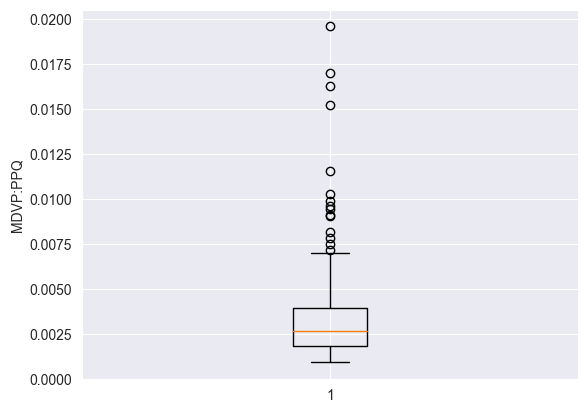

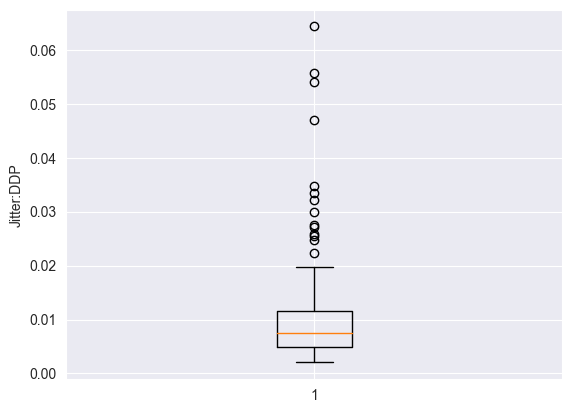

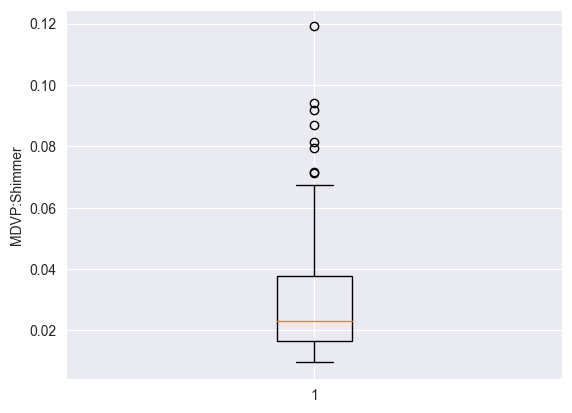

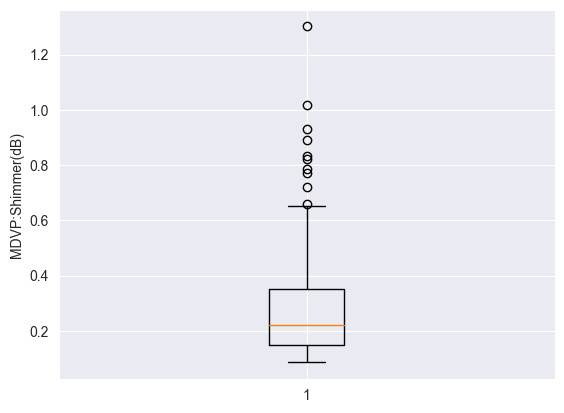

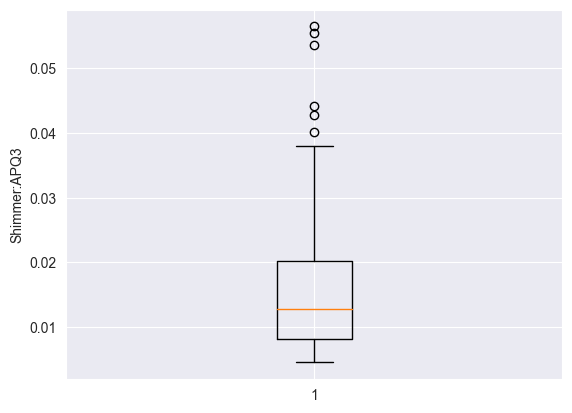

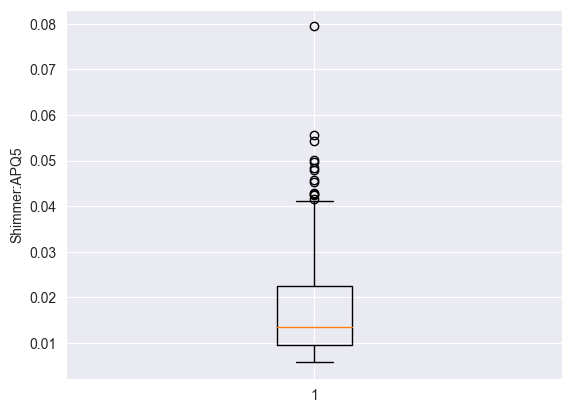

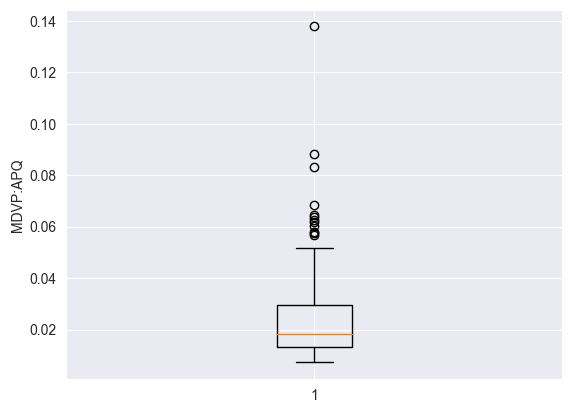

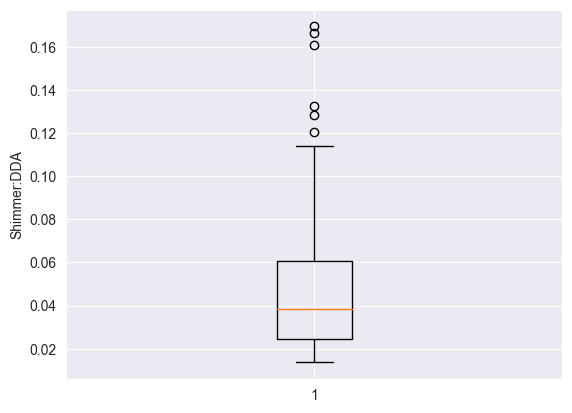

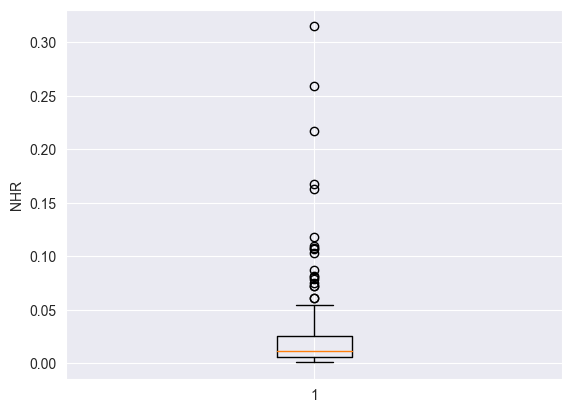

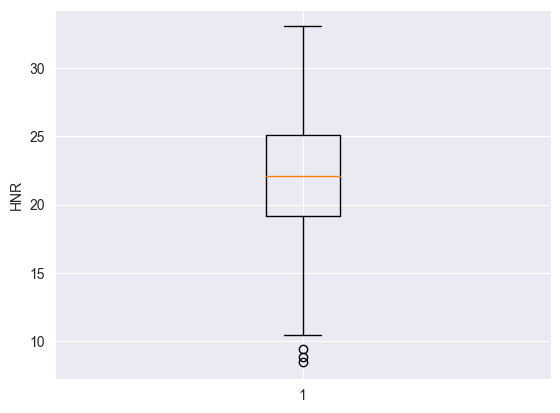

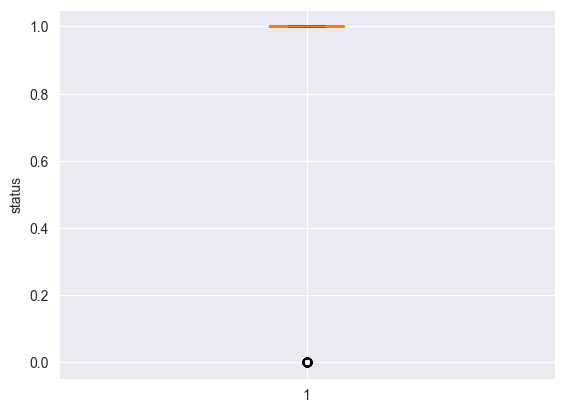

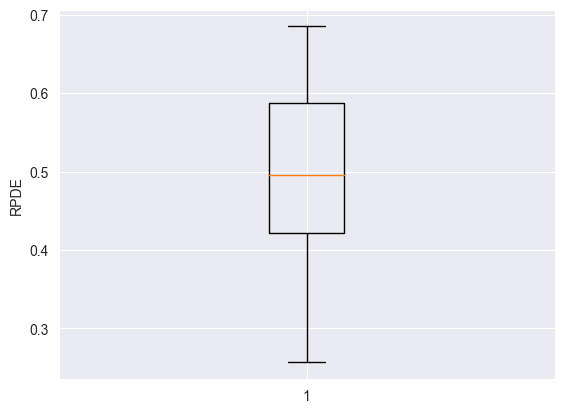

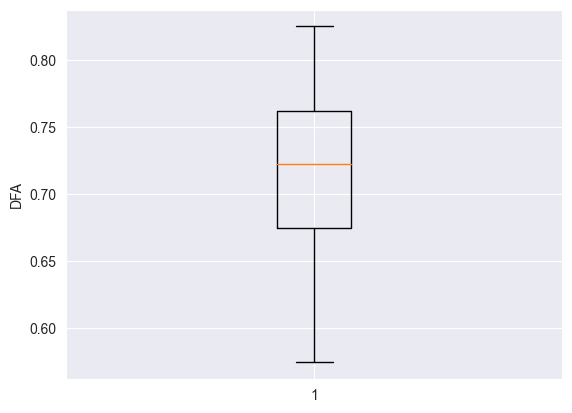

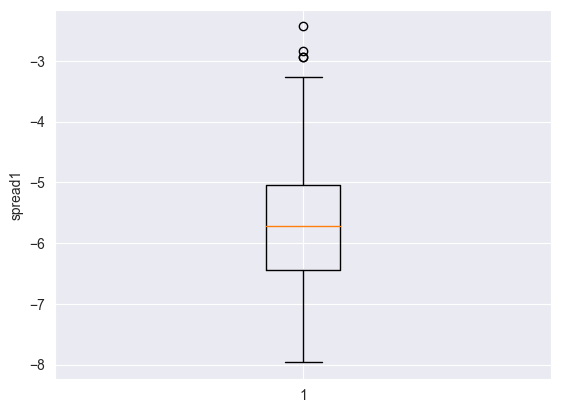

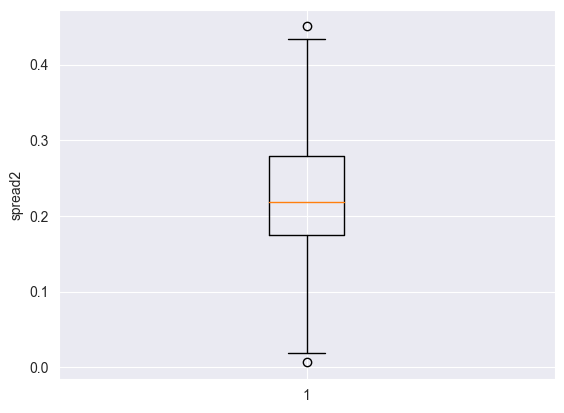

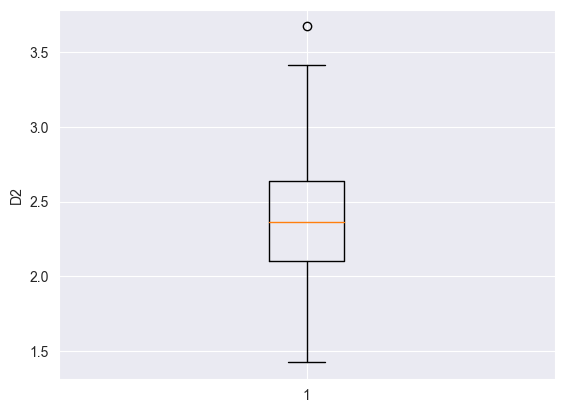

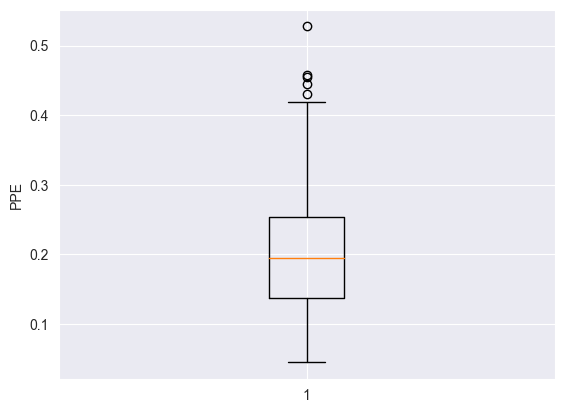

In [6]:
# Outlier Detection Analysis
for i in parkinson_data.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(parkinson_data[i])
    plt.ylabel(i)

- As we had seen previously in statistical summary, we had some outliers also present in data

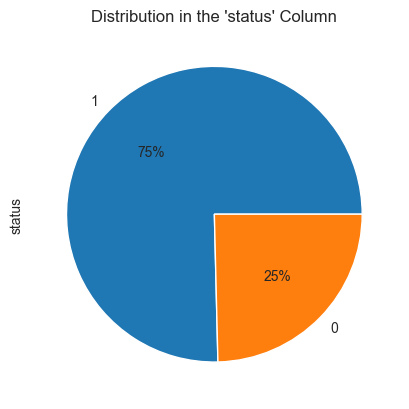

In [36]:
parkinson_data['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")
plt.title("Distribution in the 'status' Column")
plt.show()

- Target column ie status is imbalanced as 75% is for 1 and rest 25% is for 0


In [8]:
parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

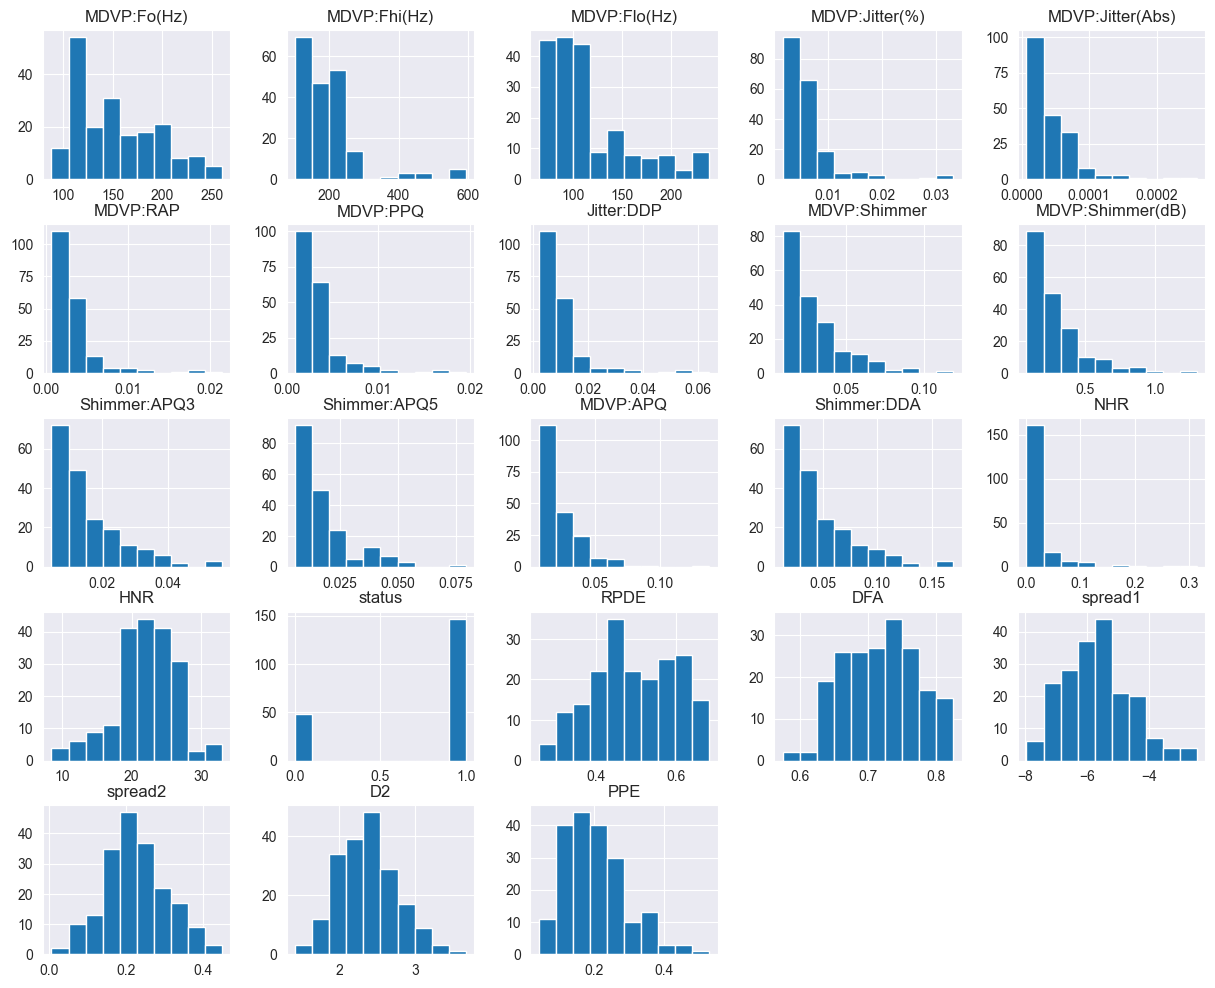

In [41]:
# Plotting the histogram for the dataset
parkinson_data.hist(figsize=(15,12));

- We can see that some of the features present in the dataset have a bell shaped curve, indicating 
that the values are normally distributed

C:\Users\prajw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


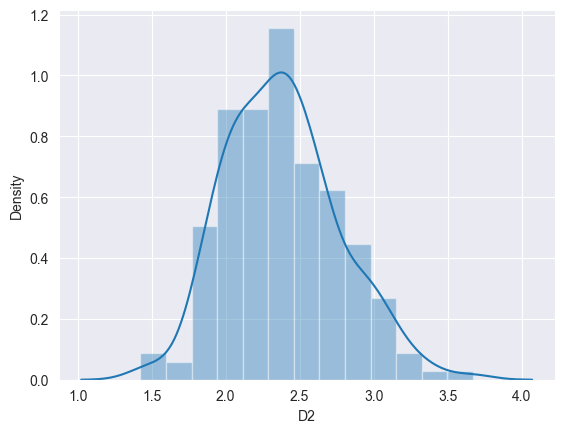

In [10]:
sns.distplot(parkinson_data['D2'])
plt.show()

- We can see some of the data is normally distributed and most of the attributes are right skewed

### Feature Engineering

In [43]:
print("Original shape of data: ", parkinson_data.shape)
x = parkinson_data.drop(['status','name'], axis=1)
print("Features shape:", x.shape)
y = parkinson_data.status
print("Target shape: ", y.shape)

Original shape of data:  (195, 24)
Features shape: (195, 22)
Target shape:  (195,)


#### Min-Max Scaler 

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
# fits the data to the MinMaxScaler
X = scaler.fit_transform(x) 

In [13]:
X

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2) 

<h2> Logistic Regression </h2>

In [15]:
from sklearn.linear_model import LogisticRegression
# Importing the Logistic Regression and creating an instance of it
clf = LogisticRegression()
#Train Model
clf.fit(x_train, y_train)

LogisticRegression()

In [16]:
# Prediction on Test and Train Set 
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [18]:
print("Training Accuracy: ", accuracy_score(y_train, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_logistic_test))

Training Accuracy:  0.8974358974358975
Test Accuracy:  0.8717948717948718


- 92% accuracy On Test Data

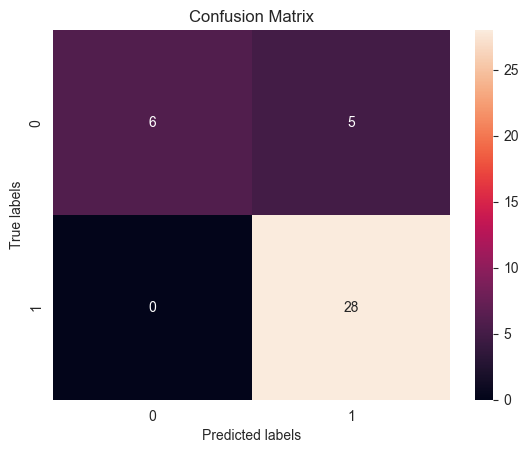

In [19]:
cm = confusion_matrix(y_test, pred_logistic_test)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, pred_logistic_test))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.85      1.00      0.92        28

    accuracy                           0.87        39
   macro avg       0.92      0.77      0.81        39
weighted avg       0.89      0.87      0.86        39



<h2 align='center'> Decision Tree </h2>

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# Train model 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [23]:
print("Training Accuracy: ", accuracy_score(y_train, pred_dt_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_dt_test))

Training Accuracy:  1.0
Test Accuracy:  0.9230769230769231


- 89% accurate in predicting Disease

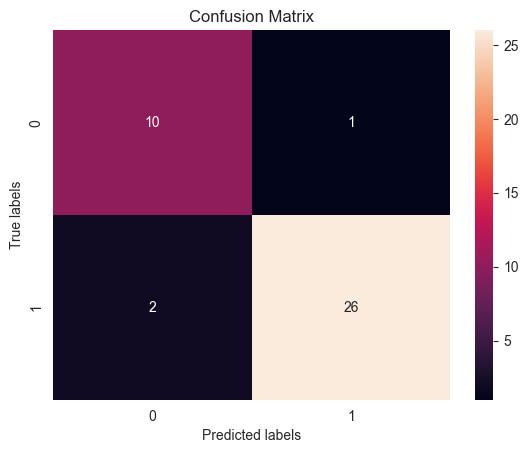

In [24]:
cm = confusion_matrix(y_test, pred_dt_test)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()

In [25]:
print("\nClassification Report:")
print(classification_report(y_test, pred_dt_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.96      0.93      0.95        28

    accuracy                           0.92        39
   macro avg       0.90      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39



<h2> Random Forest </h2>

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

In [28]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.8717948717948718


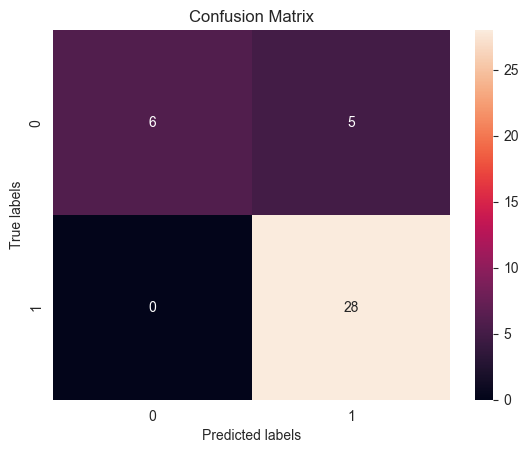

In [29]:
cm = confusion_matrix(y_test, pred_rf)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()

In [30]:
print("\nClassification Report:")
print(classification_report(y_test, pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.85      1.00      0.92        28

    accuracy                           0.87        39
   macro avg       0.92      0.77      0.81        39
weighted avg       0.89      0.87      0.86        39



<h2 align='center'> Gradient Boost </h2>

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
# Training model
gb.fit(x_train, y_train)

# Prediction on test and train set
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

In [32]:
print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  1.0
Test Accuracy:  0.8974358974358975


- 94% accurate in predicting Disease

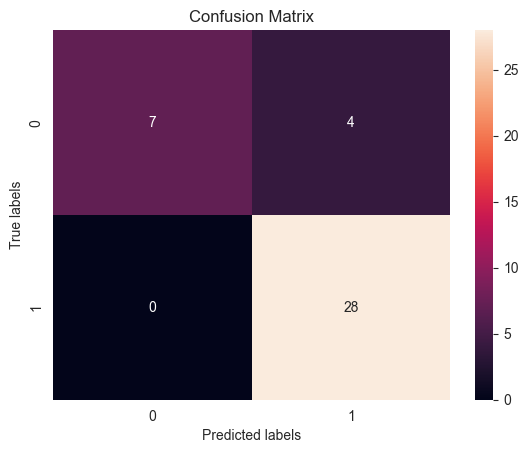

In [33]:
cm = confusion_matrix(y_test, gb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()

In [34]:
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.88      1.00      0.93        28

    accuracy                           0.90        39
   macro avg       0.94      0.82      0.86        39
weighted avg       0.91      0.90      0.89        39



### Conclusion : Random Forest and Gradient Boosting are the best suited algorithms for predicting the disease.